# <font color = 'blue'><center>Statistical NLP Project </center> </font>

In [1]:
#Import basic libraries needed for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

#### <font color = red > 1. Load the dataset (5 points)</font>
    a. Tip: As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly.

In [2]:
# Reading only few rows as data size is large (around 6.81lakh rows)
blogtext = pd.read_csv('blogtext.csv',nrows=3500)

In [3]:
# Checking number of rows & columns
print('There are {0} rows and {1} columns'.format(blogtext.shape[0],blogtext.shape[1]))

There are 3500 rows and 7 columns


In [4]:
blogtext.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [5]:
# Checking the columns in the dataset
print(pd.DataFrame(blogtext.columns, columns = ['Column Name']))

  Column Name
0          id
1      gender
2         age
3       topic
4        sign
5        date
6        text


In [6]:
# Check data types
print(blogtext.dtypes)

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object


In [7]:
# Check for null values in the data
print("Number of null values in the data : \n",blogtext.isnull().sum())

Number of null values in the data : 
 id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64


### <font color = blue >Exploratory Data Analysis (EDA) </font>

In [8]:
# Checking Top 20 Contributors
top_20 = blogtext.groupby(by='id')['id'].count().sort_values(ascending=False).head(20)

print("Top 20 Contributors : \n", top_20)

Top 20 Contributors : 
 id
589736     2107
649790      191
1415200     131
3176655     119
3022585      85
3568056      75
3581210      70
2559416      62
3168577      49
3705830      46
3359005      46
3389671      35
3429420      34
3413825      33
1550279      32
3647746      32
3667495      29
3518852      26
4030905      25
3711014      21
Name: id, dtype: int64


"The blogger with id=589736 has more than 2,000 blogs"

[Text(0, 0, '589736'),
 Text(0, 0, '649790'),
 Text(0, 0, '1415200'),
 Text(0, 0, '3176655'),
 Text(0, 0, '3022585'),
 Text(0, 0, '3568056'),
 Text(0, 0, '3581210'),
 Text(0, 0, '2559416'),
 Text(0, 0, '3168577'),
 Text(0, 0, '3359005'),
 Text(0, 0, '3705830'),
 Text(0, 0, '3389671'),
 Text(0, 0, '3429420'),
 Text(0, 0, '3413825'),
 Text(0, 0, '3647746'),
 Text(0, 0, '1550279'),
 Text(0, 0, '3667495'),
 Text(0, 0, '3518852'),
 Text(0, 0, '4030905'),
 Text(0, 0, '3711014'),
 Text(0, 0, '3539003'),
 Text(0, 0, '3309662'),
 Text(0, 0, '1932521'),
 Text(0, 0, '3389918'),
 Text(0, 0, '2012853'),
 Text(0, 0, '1240631'),
 Text(0, 0, '3808902'),
 Text(0, 0, '3644456'),
 Text(0, 0, '3649763'),
 Text(0, 0, '1238294'),
 Text(0, 0, '3668238'),
 Text(0, 0, '4036299'),
 Text(0, 0, '4275555'),
 Text(0, 0, '4313749'),
 Text(0, 0, '3960753'),
 Text(0, 0, '3486574'),
 Text(0, 0, '3785178'),
 Text(0, 0, '2435706'),
 Text(0, 0, '3573986'),
 Text(0, 0, '3931473'),
 Text(0, 0, '2059027'),
 Text(0, 0, '43044

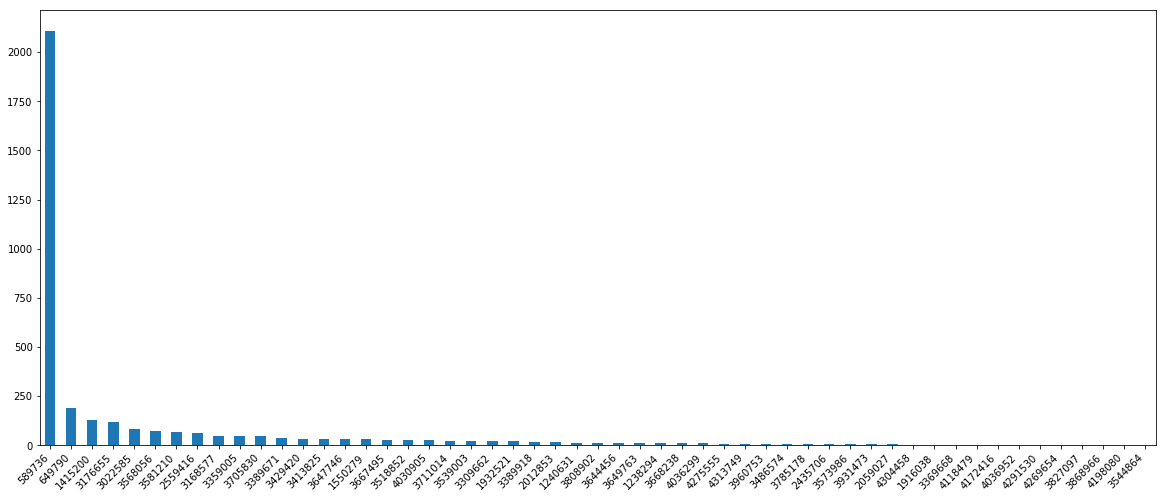

In [9]:
plt.figure(figsize=(20,8))

chart = blogtext['id'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

male      2772
female     728
Name: gender, dtype: int64


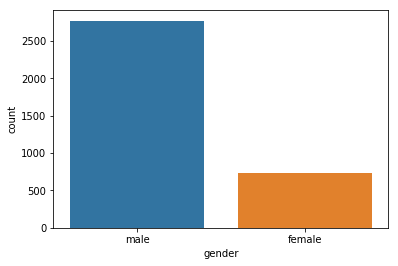

In [10]:
# Check 'Gender' distribution among bloggers
print(blogtext['gender'].value_counts())
sns.countplot(blogtext['gender'])


The number of Male bloggers is 4 times that of female bloggers.

35    2107
24     334
15     299
17     147
25     110
33      94
23      93
27      86
14      74
26      43
39      32
16      25
37      19
41      14
45      14
34       6
44       3
Name: age, dtype: int64


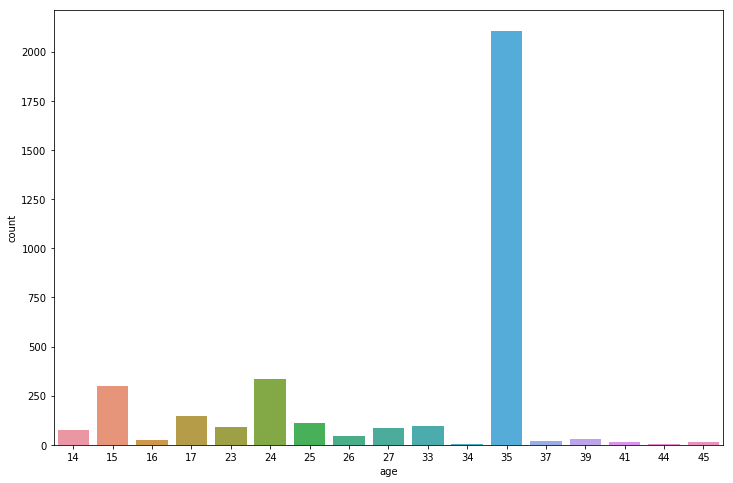

In [11]:
# Check 'Age' distribution among bloggers
print(blogtext['age'].value_counts())

plt.figure(figsize=(12,8))
sns.countplot(blogtext['age'])

In [12]:
# Check 'Topic' distribution
blogtext['topic'].value_counts()

Technology              2107
indUnk                   452
Student                  403
Engineering              119
Education                118
Sports-Recreation         75
InvestmentBanking         70
Non-Profit                46
Science                   33
BusinessServices          21
Internet                  20
Banking                   16
Communications-Media      14
Accounting                 2
Museums-Libraries          2
Arts                       2
Name: topic, dtype: int64

[Text(0, 0, 'Technology'),
 Text(0, 0, 'indUnk'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Engineering'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Sports-Recreation'),
 Text(0, 0, 'InvestmentBanking'),
 Text(0, 0, 'Non-Profit'),
 Text(0, 0, 'Science'),
 Text(0, 0, 'BusinessServices'),
 Text(0, 0, 'Internet'),
 Text(0, 0, 'Banking'),
 Text(0, 0, 'Communications-Media'),
 Text(0, 0, 'Accounting'),
 Text(0, 0, 'Museums-Libraries'),
 Text(0, 0, 'Arts')]

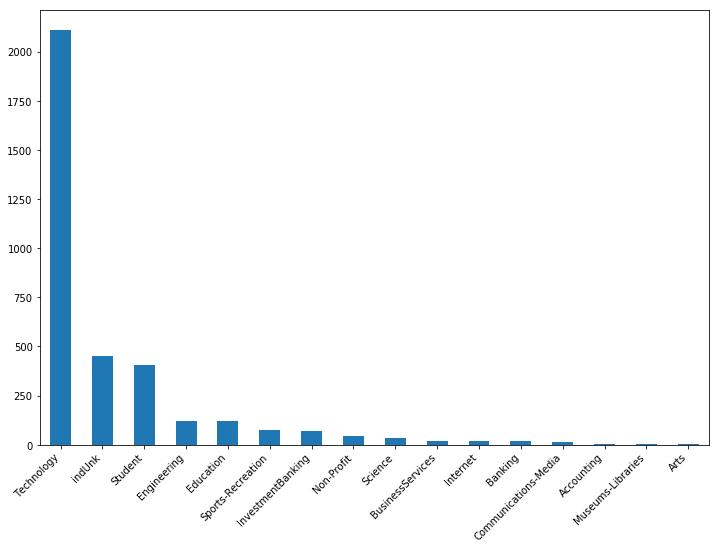

In [13]:
plt.figure(figsize=(12,8))

chart = blogtext['topic'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [14]:
# Check 'Topic' distribution
blogtext['sign'].value_counts()

Aries          2199
Libra           313
Aquarius        286
Scorpio         243
Sagittarius     113
Capricorn        77
Cancer           76
Taurus           76
Leo              55
Virgo            39
Gemini           21
Pisces            2
Name: sign, dtype: int64

[Text(0, 0, 'Aries'),
 Text(0, 0, 'Libra'),
 Text(0, 0, 'Aquarius'),
 Text(0, 0, 'Scorpio'),
 Text(0, 0, 'Sagittarius'),
 Text(0, 0, 'Capricorn'),
 Text(0, 0, 'Cancer'),
 Text(0, 0, 'Taurus'),
 Text(0, 0, 'Leo'),
 Text(0, 0, 'Virgo'),
 Text(0, 0, 'Gemini'),
 Text(0, 0, 'Pisces')]

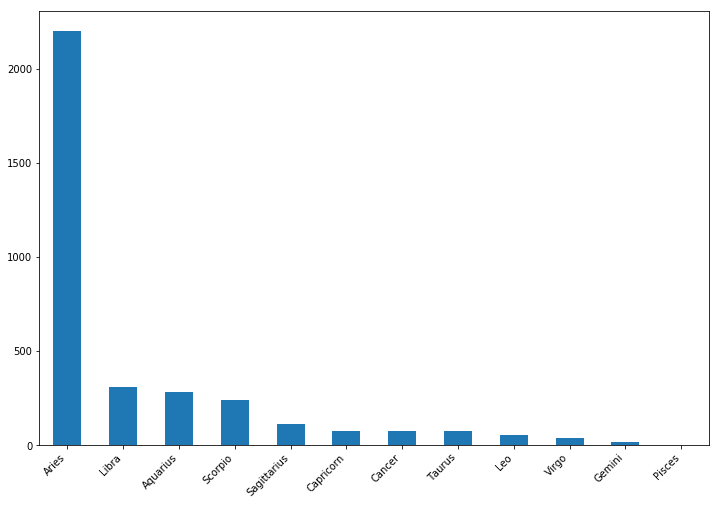

In [15]:
plt.figure(figsize=(12,8))

chart = blogtext['sign'].value_counts().plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### <font color = red > 2. Preprocess rows of the “text” column (7.5 points) </font>
#### <font color = red ><font color = red >    a. Remove unwanted characters </font>

In [16]:
import re
import nltk
from nltk.corpus import stopwords

In [17]:
# Defining function for Removing Unwanted Characters
def remove_unwanted_characters(text, remove_digits=False):
    #Using regex
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [18]:
# Created a new column 'cleanText'
blogtext['cleanText']=blogtext['text'].map(lambda s:remove_unwanted_characters(s)) 

In [19]:
blogtext.head()

,id,gender,age,topic,sign,date,text,cleanText
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,Thanks to Yahoos Toolbar I can no...


In [20]:
# Comparison between original text & cleaned text.
blogtext.iloc[0]['text']

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [21]:
blogtext.iloc[0]['cleanText']

'           Info has been found  100 pages and 45 MB of pdf files Now i have to wait untill our team leader has processed it and learns html         '

#### <font color = red > b. Convert text to lowercase </font>

In [22]:
# Defining function to make text lowercase
def convert_text_to_lowercase(text):
    text = text.lower()
    return text

In [23]:
blogtext['cleanText']=blogtext['cleanText'].map(lambda s:convert_text_to_lowercase(s)) 

In [24]:
# Comparison between original text & cleaned text.
blogtext.iloc[0]['text']

'           Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         '

In [25]:
blogtext.iloc[0]['cleanText']

'           info has been found  100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html         '

#### <font color = red > c. Remove unwanted spaces </font>

In [26]:
# Defining function to remove unwanted spaces
def remove_unwanted_spaces(text):
    text = ' '.join(filter(None,text.split(' ')))
    return text

'''Explanation:
        1. Split the entire string into a list.
        2. Filter empty elements from the list.
        3. Rejoin the remaining elements with a single space'''

'Explanation:\n        1. Split the entire string into a list.\n        2. Filter empty elements from the list.\n        3. Rejoin the remaining elements with a single space'

In [27]:
blogtext['cleanText']=blogtext['cleanText'].map(lambda s:remove_unwanted_spaces(s)) 

In [28]:
# Comparison between original text & cleaned text.
blogtext.iloc[1]['text']

'           These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          '

In [29]:
blogtext.iloc[1]['cleanText']

'these are the team members drewes van der laag urllink mail ruiyu xie urllink mail bryan aaldering me urllink mail'

#### <font color = red > d. Remove stopwords </font>

In [30]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [31]:
stop_words = stopwords.words('english') + list(punctuation)

In [32]:
# Defining function to remove stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    words = [w for w in words if w not in stop_words and not w.isdigit()]
    words = (" ").join(words)
    return words

In [33]:
# Comparison between before & after removing stopwords
blogtext.iloc[0]['cleanText']

'info has been found 100 pages and 45 mb of pdf files now i have to wait untill our team leader has processed it and learns html'

In [34]:
blogtext['cleanText']=blogtext['cleanText'].map(lambda s:remove_stopwords(s)) 

In [35]:
blogtext.iloc[0]['cleanText']

'info found pages mb pdf files wait untill team leader processed learns html'

In [36]:
blogtext.head()

,id,gender,age,topic,sign,date,text,cleanText
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!,testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...


#### <font color = red >3. As we want to make this into a multi-label classification problem, you are required to merge all the label columns together, so that we have all the labels together for a particular sentence (7.5 points) </font>
    a. Label columns to merge: “gender”, “age”, “topic”, “sign”
    b. After completing the previous step, there should be only two columns in your data frame i.e. “text” and “labels” as shown in the below image

In [37]:
blogtext["labels"] = blogtext[["gender","age","topic","sign"]].apply(lambda row: list(row),axis=1)

In [38]:
blogtext.drop(["id","gender","age","topic","sign","date","text"],axis=1,inplace=True)

In [39]:
blogtext.head()

,cleanText,labels
0,info found pages mb pdf files wait untill team...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


#### <font color = red >4. Separate features and labels, and split the data into training and testing (5 points) </font>

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(blogtext.cleanText, blogtext.labels,test_size=0.20, random_state=1)

In [42]:
#Traing data
print(X_train.shape)
print(y_train.shape)

(2800,)
(2800,)


In [43]:
#Test Data
print(X_test.shape)
print(y_test.shape)

(700,)
(700,)


#### <font color = red >5. Vectorize the features (5 points) </font>
    a. Create a Bag of Words using count vectorizer
        i. Use ngram_range=(1, 2)
        ii. Vectorize training and testing features
    b. Print the term-document matrix

In [44]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 2))

In [45]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [46]:
#Check the vocablury size
len(vect.vocabulary_)

194490

In [47]:
# examine the fitted vocabulary
vect.get_feature_names()

['0o',
 '0o well',
 '0s',
 '0s 12s',
 '100am',
 '100am know',
 '100days',
 '100days celebration',
 '100m',
 '100m songs',
 '100pre',
 '100pre hacen',
 '100something',
 '100something want',
 '100th',
 '100th attempt',
 '100th birthday',
 '100th post',
 '100th store',
 '100x',
 '100x popular',
 '101st',
 '101st airborne',
 '1030am',
 '1030am everyone',
 '1045am',
 '1045am woohoo',
 '1045pm',
 '1045pm serious',
 '10ambut',
 '10ambut till',
 '10freakin45',
 '10freakin45 like',
 '10just',
 '10just wondering',
 '10midnight',
 '10midnight one',
 '10mile',
 '10mile fun',
 '10nbsp',
 '10nbsp like',
 '10pm',
 '10pm 1am',
 '10pm rolls',
 '10pm went',
 '10pmet',
 '10pmet also',
 '10th',
 '10th 11th',
 '10th afterwards',
 '10th dinner',
 '10th finally',
 '10th grade',
 '10wordsorless',
 '10wordsorless instructions',
 '10x',
 '10x worse',
 '11001300ad',
 '11001300ad right',
 '1100th',
 '1100th croissant',
 '1127am',
 '1127am fast',
 '1130am',
 '1130am dad',
 '1130nvmstill',
 '1130nvmstill irritated'

In [48]:
# check the type of the document-term matrix
print(type(X_train_dtm))

# examine the sparse matrix contents
# represented coordinates, and the values at that coordinates
print(X_train_dtm)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 25995)	1
  (0, 37137)	1
  (0, 49792)	1
  (0, 108673)	1
  (0, 49866)	1
  (0, 147541)	1
  (0, 110917)	1
  (0, 154406)	1
  (0, 94509)	1
  (0, 184532)	1
  (0, 4930)	1
  (0, 177984)	1
  (0, 73492)	1
  (0, 53415)	1
  (0, 83642)	1
  (0, 115458)	1
  (0, 191087)	1
  (0, 88896)	1
  (0, 139774)	1
  (0, 172259)	1
  (0, 138325)	1
  (0, 17043)	1
  (0, 187690)	1
  (0, 87298)	1
  (0, 89026)	1
  :	:
  (2799, 9523)	1
  (2799, 117038)	2
  (2799, 26171)	2
  (2799, 122585)	3
  (2799, 170897)	1
  (2799, 67383)	1
  (2799, 23721)	2
  (2799, 51903)	1
  (2799, 67951)	1
  (2799, 185220)	1
  (2799, 167986)	1
  (2799, 66497)	3
  (2799, 168323)	1
  (2799, 64581)	2
  (2799, 172616)	1
  (2799, 80657)	1
  (2799, 142719)	1
  (2799, 94817)	4
  (2799, 179483)	1
  (2799, 135995)	1
  (2799, 68666)	2
  (2799, 85373)	1
  (2799, 185825)	3
  (2799, 184350)	1
  (2799, 172043)	1


In [49]:
# examine the vocabulary and document-term matrix together
# pd.DataFrame(matrix, columns=columns)
# pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names()) // getting memory error as data is huge


In [50]:
# Print X_test_dtm
print(X_test_dtm)

  (0, 2056)	1
  (0, 2114)	1
  (0, 11933)	1
  (0, 12266)	1
  (0, 12670)	1
  (0, 16174)	1
  (0, 16231)	1
  (0, 19308)	1
  (0, 21389)	1
  (0, 21390)	1
  (0, 21887)	1
  (0, 22507)	1
  (0, 22510)	1
  (0, 23242)	1
  (0, 23721)	1
  (0, 23890)	1
  (0, 33619)	1
  (0, 37182)	1
  (0, 37206)	1
  (0, 44357)	2
  (0, 44503)	1
  (0, 44597)	1
  (0, 46700)	1
  (0, 49661)	1
  (0, 53162)	1
  :	:
  (698, 123338)	1
  (698, 123596)	1
  (698, 143923)	1
  (698, 155750)	1
  (698, 171791)	1
  (698, 175640)	1
  (698, 188429)	1
  (699, 1801)	1
  (699, 2639)	1
  (699, 11008)	1
  (699, 29180)	1
  (699, 31642)	1
  (699, 62537)	1
  (699, 82131)	1
  (699, 83204)	1
  (699, 112800)	1
  (699, 115283)	1
  (699, 127201)	1
  (699, 127248)	1
  (699, 128911)	1
  (699, 130659)	1
  (699, 130677)	1
  (699, 136493)	2
  (699, 137779)	1
  (699, 139401)	1


In [51]:
#What is there in the vocabulary
vect.vocabulary_

{'yes': 193118,
 'lifted': 94666,
 'quote': 134131,
 'dear': 39304,
 'abby': 910,
 'hey': 75602,
 'words': 189595,
 'martin': 103077,
 'luther': 100438,
 'king': 89015,
 'jr': 87287,
 'whose': 187688,
 'birthday': 17010,
 'remember': 138222,
 'today': 172043,
 'retaliate': 139772,
 'kind': 88737,
 'would': 190795,
 'nothing': 115390,
 'intensify': 83641,
 'existence': 53407,
 'hate': 73362,
 'universe': 177982,
 'along': 4855,
 'way': 184350,
 'life': 94287,
 'someone': 154305,
 'must': 110823,
 'sense': 147523,
 'enough': 49753,
 'morality': 108671,
 'cut': 37131,
 'chain': 25994,
 'yes lifted': 193199,
 'lifted quote': 94668,
 'quote dear': 134137,
 'dear abby': 39305,
 'abby hey': 911,
 'hey words': 75672,
 'words martin': 189659,
 'martin luther': 103079,
 'luther king': 100439,
 'king jr': 89026,
 'jr whose': 87298,
 'whose birthday': 187690,
 'birthday remember': 17043,
 'remember today': 138325,
 'today retaliate': 172259,
 'retaliate kind': 139774,
 'kind would': 88896,
 'would

In [52]:
#Convert Training X_train into Count Vectors
X_train_ct = vect.transform(X_train)

In [53]:
#Size of Document Term Matrix
X_train_ct.shape

(2800, 194490)

In [54]:
#Let's check the first record of X_train
print(X_train_ct[0])

  (0, 910)	1
  (0, 911)	1
  (0, 4855)	1
  (0, 4930)	1
  (0, 17010)	1
  (0, 17043)	1
  (0, 25994)	1
  (0, 25995)	1
  (0, 37131)	1
  (0, 37137)	1
  (0, 39304)	1
  (0, 39305)	1
  (0, 49753)	2
  (0, 49792)	1
  (0, 49866)	1
  (0, 53407)	1
  (0, 53415)	1
  (0, 73362)	2
  (0, 73492)	1
  (0, 75602)	1
  (0, 75672)	1
  (0, 83641)	1
  (0, 83642)	1
  (0, 87287)	1
  (0, 87298)	1
  :	:
  (0, 115458)	1
  (0, 134131)	1
  (0, 134137)	1
  (0, 138222)	1
  (0, 138325)	1
  (0, 139772)	1
  (0, 139774)	1
  (0, 147523)	1
  (0, 147541)	1
  (0, 154305)	1
  (0, 154406)	1
  (0, 172043)	1
  (0, 172259)	1
  (0, 177982)	1
  (0, 177984)	1
  (0, 184350)	1
  (0, 184532)	1
  (0, 187688)	1
  (0, 187690)	1
  (0, 189595)	1
  (0, 189659)	1
  (0, 190795)	1
  (0, 191087)	1
  (0, 193118)	1
  (0, 193199)	1


In [55]:
X_test_ct = vect.transform(X_test)

In [56]:
X_test_ct.shape

(700, 194490)

In [57]:
#Let's check the first record of X_test
print(X_test_ct[0])

  (0, 2056)	1
  (0, 2114)	1
  (0, 11933)	1
  (0, 12266)	1
  (0, 12670)	1
  (0, 16174)	1
  (0, 16231)	1
  (0, 19308)	1
  (0, 21389)	1
  (0, 21390)	1
  (0, 21887)	1
  (0, 22507)	1
  (0, 22510)	1
  (0, 23242)	1
  (0, 23721)	1
  (0, 23890)	1
  (0, 33619)	1
  (0, 37182)	1
  (0, 37206)	1
  (0, 44357)	2
  (0, 44503)	1
  (0, 44597)	1
  (0, 46700)	1
  (0, 49661)	1
  (0, 53162)	1
  :	:
  (0, 156658)	1
  (0, 162076)	1
  (0, 162077)	1
  (0, 162151)	1
  (0, 164462)	1
  (0, 164526)	1
  (0, 166997)	1
  (0, 172043)	1
  (0, 172046)	1
  (0, 172861)	1
  (0, 175059)	1
  (0, 182299)	1
  (0, 182333)	1
  (0, 182860)	1
  (0, 182861)	1
  (0, 185825)	1
  (0, 185911)	1
  (0, 187500)	1
  (0, 189111)	1
  (0, 189720)	1
  (0, 189971)	1
  (0, 192088)	1
  (0, 192117)	2
  (0, 192335)	3
  (0, 194299)	1


<font color = red ><p><strong>6. Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference (5 points) 
    <br><img src="https://drive.google.com/thumbnail?id=1bB_Kp1V5QzUBdLQcfERe7aj-_Uq1iHoO" alt="dictionary_sample_image" align="left"></p></font></strong>


In [58]:
from collections import defaultdict

In [59]:
label_counts = defaultdict(int)
labels = blogtext['labels']

In [60]:
for row in labels:
    for element in row:
        label_counts[element] += 1 #increment if found

In [61]:
isinstance(label_counts, dict)

True

In [62]:
label_dict = dict(label_counts)

label_dict

{'male': 2772,
 15: 299,
 'Student': 403,
 'Leo': 55,
 33: 94,
 'InvestmentBanking': 70,
 'Aquarius': 286,
 'female': 728,
 14: 74,
 'indUnk': 452,
 'Aries': 2199,
 25: 110,
 'Capricorn': 77,
 17: 147,
 'Gemini': 21,
 23: 93,
 'Non-Profit': 46,
 'Cancer': 76,
 'Banking': 16,
 37: 19,
 'Sagittarius': 113,
 26: 43,
 24: 334,
 'Scorpio': 243,
 27: 86,
 'Education': 118,
 45: 14,
 'Engineering': 119,
 'Libra': 313,
 'Science': 33,
 34: 6,
 41: 14,
 'Communications-Media': 14,
 'BusinessServices': 21,
 'Sports-Recreation': 75,
 'Virgo': 39,
 'Taurus': 76,
 'Arts': 2,
 'Pisces': 2,
 44: 3,
 16: 25,
 'Internet': 20,
 'Museums-Libraries': 2,
 'Accounting': 2,
 39: 32,
 35: 2107,
 'Technology': 2107}

In [63]:
len(label_dict)

47

#### <font color = red >7. Transform the labels - (7.5 points)</font>
As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn <br>a. Convert your train and test labels using MultiLabelBinarizer

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer
# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer(classes=list(label_dict.keys()))

In [65]:
# Fit and transform
labels_train_enc = mlb.fit_transform(y_train)

In [66]:
# Encode labels
labels_test_enc = mlb.transform(y_test)

In [67]:
# View classes
mlb.classes_

array(['male', 15, 'Student', 'Leo', 33, 'InvestmentBanking', 'Aquarius',
       'female', 14, 'indUnk', 'Aries', 25, 'Capricorn', 17, 'Gemini', 23,
       'Non-Profit', 'Cancer', 'Banking', 37, 'Sagittarius', 26, 24,
       'Scorpio', 27, 'Education', 45, 'Engineering', 'Libra', 'Science',
       34, 41, 'Communications-Media', 'BusinessServices',
       'Sports-Recreation', 'Virgo', 'Taurus', 'Arts', 'Pisces', 44, 16,
       'Internet', 'Museums-Libraries', 'Accounting', 39, 35,
       'Technology'], dtype=object)

In [68]:
# Encoded train labels
print(labels_train_enc.shape)
print(labels_train_enc)

(2800, 47)
[[1 0 0 ... 0 1 1]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


In [69]:
# Encoded test labels
print(labels_test_enc.shape)
print(labels_test_enc)

(700, 47)
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 1]
 ...
 [1 0 0 ... 0 1 1]
 [1 0 0 ... 0 1 1]
 [1 0 0 ... 0 1 1]]


#### <font color = red >8. Choose a classifier - (5 points) </font>
In this task, we suggest using the One-vs-Rest approach, which is implemented in OneVsRestClassifier class. In this approach k classifiers (= number of tags) are trained. As a basic classifier, use LogisticRegression. It is one of the simplest methods, but often it performs good enough in text classification tasks. It might take some time because the number of classifiers to train is large.<br>
    a. Use a linear classifier of your choice, wrap it up in OneVsRestClassifier to train it on every label<br>
    b. As One-vs-Rest approach might not have been discussed in the sessions, we are providing you the code for that

<img src="https://drive.google.com/thumbnail?id=1vE-08mE8dTSQwZO-2Zv3J4BiFtlG5V7w" alt="One_vs_Rest_image" align="left" width="500" height="500"></p>

In [70]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs')
clf = OneVsRestClassifier(estimator = clf)

In [71]:
# fit the model with data 
clf.fit(X_train_ct, labels_train_enc)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

#### <font color = red >9. Fit the classifier, make predictions and get the accuracy (5 points)</font>
    a. Print the following
        i. Accuracy score
        ii. F1 score
        iii. Average precision score
        iv. Average recall score
        v. Tip: Make sure you are familiar with all of them. How would you expect the 
        things to work for the multi-label scenario? Read about micro/macro/weighted averaging

In [72]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Evaluation on Test Dataset

In [73]:
labels_pred = clf.predict(X_test_ct)

In [74]:
#Calculate accuracy on Test Dataset
print(f'Accuracy Score : {accuracy_score(labels_test_enc,labels_pred): 0.2f}')

Accuracy Score :  0.62


In [75]:
# micro/macro/weighted averaging
avg = ["macro","micro","weighted"]

In [76]:
F1_Score = []
Precision_Score = []
Recall_Score = []

for a in avg:
    F1_Score.append(f1_score(labels_test_enc,labels_pred,average=a))
    Precision_Score.append(precision_score(labels_test_enc,labels_pred,average=a))
    Recall_Score.append(recall_score(labels_test_enc,labels_pred,average=a))

In [77]:
# Create a zipped list from above lists
zippedList =  list(zip(F1_Score, Precision_Score, Recall_Score))

# Create a dataframe from zipped list
df_scores = pd.DataFrame(zippedList, columns = ['F1_Score' , 'Precision_Score', 'Recall_Score'], index=avg) 
df_scores.round(3)

,F1_Score,Precision_Score,Recall_Score
macro,0.280,0.436,0.231
micro,0.769,0.832,0.715
weighted,0.720,0.788,0.715


In [78]:
#Classification Report

print("Classification Report")
print(classification_report(labels_test_enc,labels_pred,target_names=[str(x) for x in mlb.classes]))

Classification Report
                      precision    recall  f1-score   support

                male       0.85      0.96      0.90       540
                  15       0.96      0.38      0.54        66
             Student       0.85      0.34      0.48        86
                 Leo       1.00      0.07      0.12        15
                  33       0.82      0.50      0.62        18
   InvestmentBanking       0.88      0.54      0.67        13
            Aquarius       0.74      0.23      0.35        60
              female       0.77      0.41      0.54       160
                  14       0.50      0.06      0.11        17
              indUnk       0.60      0.29      0.39       102
               Aries       0.84      0.93      0.88       430
                  25       0.20      0.05      0.08        19
           Capricorn       1.00      0.43      0.60        14
                  17       0.85      0.44      0.58        25
              Gemini       0.00      0.00      

#### <font color = red >10. Print true label and predicted label for any five examples (7.5 points)</font>

Using random function to select 5 random data

In [79]:
k=5
seed=4
random.seed(seed)
# print ('Actual Vs Predicted')
#Generate 5 random numbers between 10 and 500
random_list = random.sample(range(10, 500),k)

Test_Sample_No = []
Actual_Sample = []
Predicted_Sample = []

for i in random_list :
    Test_Sample_No.append(i)
    Actual_Sample.append(mlb.inverse_transform(labels_test_enc)[i])
    Predicted_Sample.append(mlb.inverse_transform(labels_pred)[i])
    
# Create a zipped list from above lists
zippedList =  list(zip(Test_Sample_No, Actual_Sample, Predicted_Sample))

# Create a dataframe from zipped list
df = pd.DataFrame(zippedList, columns = ['Test_Sample_No' , 'Actual_Sample', 'Predicted_Sample'])
df

,Test_Sample_No,Actual_Sample,Predicted_Sample
0,130,"(male, Aries, 35, Technology)","(male, Aries, 35, Technology)"
1,165,"(33, Aquarius, female, Banking)","(male, 25, Non-Profit, Cancer)"
2,62,"(male, 33, InvestmentBanking, Aquarius)","(male, 33)"
3,379,"(male, Aries, 35, Technology)","(male, Aries, 35, Technology)"
4,212,"(male, Aries, 35, Technology)","(male, Aries, 35, Technology)"
